<a href="https://colab.research.google.com/github/visheshvg/UCS654-Predictive-Analytics-using-Statistics/blob/main/Assignment-1/Assignment_1_PDF_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/data.csv", encoding="latin1", low_memory=False)

x = df["no2"].dropna().values

r = 102303961

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

z = x + a_r * np.sin(b_r * x)

mu = np.mean(z)
variance = np.var(z)
lam = 1 / (2 * variance)
c = np.sqrt(lam / np.pi)


print("The Learned parameters are:")
print("mu: ", mu)
print("lambda: ", lam)
print("c: ", c)

The Learned parameters are:
mu:  21.450002248487653
lambda:  0.0022052699187116538
c:  0.026494512957018927


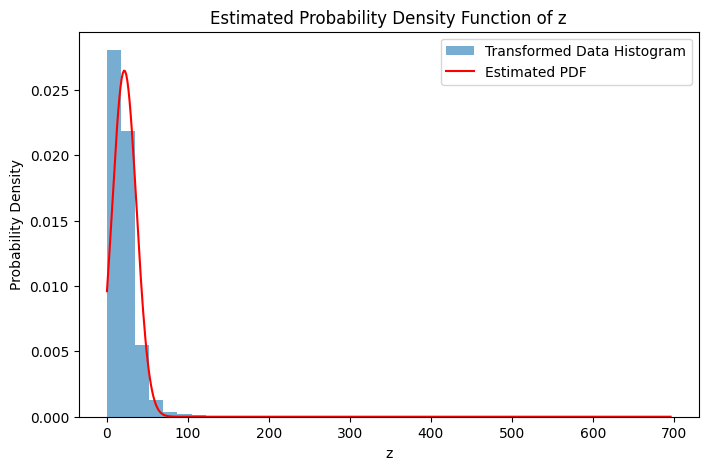

In [6]:
z_range = np.linspace(min(z), max(z), 500)
pdf_est = c * np.exp(-lam * (z_range - mu)**2)

plt.figure(figsize=(8,5))
plt.hist(z, bins=40, density=True, alpha=0.6, label="Transformed Data Histogram")
plt.plot(z_range, pdf_est, 'r', label="Estimated PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Estimated Probability Density Function of z")
plt.legend()
plt.show()